In [2]:
import pandas as pd
import string
import seaborn as sns

from nltk.corpus import stopwords

from sklearn.feature_extraction.text import CountVectorizer

from sklearn.feature_extraction.text import TfidfTransformer

from sklearn.model_selection import train_test_split

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression, LinearRegression

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.pipeline import Pipeline

%matplotlib inline

In [3]:
df = pd.read_csv('/Users/aaronschwartzman/projects/yelp_nlp/yelp_review_nlp_prediction/data/yelp_academic_dataset_review.csv')


In [4]:
df.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [5]:
df.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  10000 non-null  object
 1   date         10000 non-null  object
 2   review_id    10000 non-null  object
 3   stars        10000 non-null  int64 
 4   text         10000 non-null  object
 5   type         10000 non-null  object
 6   user_id      10000 non-null  object
 7   cool         10000 non-null  int64 
 8   useful       10000 non-null  int64 
 9   funny        10000 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 781.4+ KB


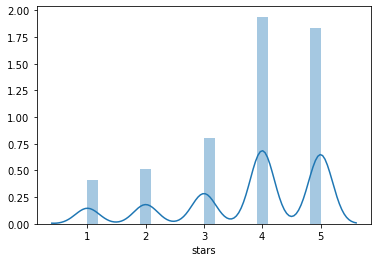

In [7]:
sns.distplot(df["stars"])

In [8]:
df["stars"].value_counts()

4    3526
5    3337
3    1461
2     927
1     749
Name: stars, dtype: int64

In [9]:


df = df[(df["stars"] == 1) | (df["stars"] == 5)]

X_Data = df["text"]
Y_Data = df["stars"]

cv = CountVectorizer()

X_Data = cv.fit_transform(X_Data)

X_Train, X_Test, Y_Train, Y_Test = train_test_split(X_Data, Y_Data, test_size = 0.3, random_state = 101)
model = MultinomialNB()

model.fit(X_Train, Y_Train)
predicted = model.predict(X_Test)

print(classification_report(Y_Test, predicted))

              precision    recall  f1-score   support

           1       0.88      0.70      0.78       228
           5       0.93      0.98      0.96       998

    accuracy                           0.93      1226
   macro avg       0.91      0.84      0.87      1226
weighted avg       0.92      0.93      0.92      1226



In [26]:
# clean text
#lowercase text

df["clean_text"] = df["text"].apply(lambda x: " ".join(word.lower() for word in x.split()))

<ipython-input-26-8c8f60711479>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["clean_text"] = df["text"].apply(lambda x: " ".join(word.lower() for word in x.split()))


In [27]:
df

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,clean_text,punctuation,stopwords
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,my wife took me here on my birthday for breakf...,my wife took me here on my birthday for breakf...,wife took birthday breakfast excellent weather...
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,i have no idea why some people give bad review...,i have no idea why some people give bad review...,idea people give bad reviews place goes show p...
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0,"rosie, dakota, and i love chaparral dog park!!...",rosie dakota and i love chaparral dog park its...,rosie dakota love chaparral dog park convenien...
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,general manager scott petello is a good egg!!!...,general manager scott petello is a good egg no...,general manager scott petello good egg go deta...
6,zp713qNhx8d9KCJJnrw1xA,2010-02-12,riFQ3vxNpP4rWLk_CSri2A,5,Drop what you're doing and drive here. After I...,review,wFweIWhv2fREZV_dYkz_1g,7,7,4,drop what you're doing and drive here. after i...,drop what youre doing and drive here after i a...,drop youre drive ate go back next day food goo...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9990,R8VwdLyvsp9iybNqRvm94g,2011-10-03,pcEeHdAJPoFNF23es0kKWg,5,Yes I do rock the hipster joints. I dig this ...,review,b92Y3tyWTQQZ5FLifex62Q,1,1,1,yes i do rock the hipster joints. i dig this p...,yes i do rock the hipster joints i dig this pl...,yes rock hipster joints dig place little bit s...
9991,WJ5mq4EiWYAA4Vif0xDfdg,2011-12-05,EuHX-39FR7tyyG1ElvN1Jw,5,Only 4 stars? \n\n(A few notes: The folks that...,review,hTau-iNZFwoNsPCaiIUTEA,1,1,0,only 4 stars? (a few notes: the folks that rat...,only 4 stars a few notes the folks that rated ...,4 stars notes folks rated place low must isola...
9992,f96lWMIAUhYIYy9gOktivQ,2009-03-10,YF17z7HWlMj6aezZc-pVEw,5,I'm not normally one to jump at reviewing a ch...,review,W_QXYA7A0IhMrvbckz7eVg,2,3,2,i'm not normally one to jump at reviewing a ch...,im not normally one to jump at reviewing a cha...,im normally one jump reviewing chain restauran...
9994,L3BSpFvxcNf3T_teitgt6A,2012-03-19,0nxb1gIGFgk3WbC5zwhKZg,5,Let's see...what is there NOT to like about Su...,review,OzOZv-Knlw3oz9K5Kh5S6A,1,2,1,let's see...what is there not to like about su...,lets seewhat is there not to like about surpri...,lets seewhat like surprise stadium well 950 ta...


In [28]:
df['punctuation'] = df['clean_text'].str.replace('[^\w\s]', '')

<ipython-input-28-bc326bd60e7e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['punctuation'] = df['clean_text'].str.replace('[^\w\s]', '')


In [29]:
df.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,clean_text,punctuation,stopwords
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,my wife took me here on my birthday for breakf...,my wife took me here on my birthday for breakf...,wife took birthday breakfast excellent weather...
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,i have no idea why some people give bad review...,i have no idea why some people give bad review...,idea people give bad reviews place goes show p...
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0,"rosie, dakota, and i love chaparral dog park!!...",rosie dakota and i love chaparral dog park its...,rosie dakota love chaparral dog park convenien...
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,general manager scott petello is a good egg!!!...,general manager scott petello is a good egg no...,general manager scott petello good egg go deta...
6,zp713qNhx8d9KCJJnrw1xA,2010-02-12,riFQ3vxNpP4rWLk_CSri2A,5,Drop what you're doing and drive here. After I...,review,wFweIWhv2fREZV_dYkz_1g,7,7,4,drop what you're doing and drive here. after i...,drop what youre doing and drive here after i a...,drop youre drive ate go back next day food goo...


In [30]:
stop_words = stopwords.words('english')

In [31]:
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [32]:
df['stopwords'] = df['punctuation'].apply(lambda x: " ".join(word for word in x.split() if word not in stop_words))

<ipython-input-32-4038ff30f60b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['stopwords'] = df['punctuation'].apply(lambda x: " ".join(word for word in x.split() if word not in stop_words))


In [33]:
df.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,clean_text,punctuation,stopwords
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,my wife took me here on my birthday for breakf...,my wife took me here on my birthday for breakf...,wife took birthday breakfast excellent weather...
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,i have no idea why some people give bad review...,i have no idea why some people give bad review...,idea people give bad reviews place goes show p...
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0,"rosie, dakota, and i love chaparral dog park!!...",rosie dakota and i love chaparral dog park its...,rosie dakota love chaparral dog park convenien...
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,general manager scott petello is a good egg!!!...,general manager scott petello is a good egg no...,general manager scott petello good egg go deta...
6,zp713qNhx8d9KCJJnrw1xA,2010-02-12,riFQ3vxNpP4rWLk_CSri2A,5,Drop what you're doing and drive here. After I...,review,wFweIWhv2fREZV_dYkz_1g,7,7,4,drop what you're doing and drive here. after i...,drop what youre doing and drive here after i a...,drop youre drive ate go back next day food goo...


In [34]:
df = df[(df["stars"] == 1) | (df["stars"] == 5)]


X_Data = df["stopwords"]
Y_Data = df["stars"]

cv = CountVectorizer()

X_Data = cv.fit_transform(X_Data)

X_Train, X_Test, Y_Train, Y_Test = train_test_split(X_Data, Y_Data, test_size = 0.3, random_state = 101)
model = MultinomialNB()

model.fit(X_Train, Y_Train)
predicted = model.predict(X_Test)

print(classification_report(Y_Test, predicted))

              precision    recall  f1-score   support

           1       0.85      0.72      0.78       228
           5       0.94      0.97      0.96       998

    accuracy                           0.93      1226
   macro avg       0.90      0.85      0.87      1226
weighted avg       0.92      0.93      0.92      1226

